In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [20]:
# 0) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features = 1, noise = 20, random_state = 4)

# Cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

y = y.view(y.shape[0],1)

n_samples, n_features = X.shape

In [21]:
# 1) Model
# Linear model : f = wx + b

input_size = n_features #1
output_size = 1

model = nn.Linear(input_size, output_size)

In [22]:
# 2) Loss and Optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [23]:
# 3) Training loop

num_epochs = 100
for epoch in range(num_epochs):
  # Forward Pass and Loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # Backward Pass and Update
  loss.backward()
  optimizer.step()

  # Emptying gradient before new step
  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

epoch: 10, loss = 4120.1987
epoch: 20, loss = 2902.2466
epoch: 30, loss = 2071.9663
epoch: 40, loss = 1505.8427
epoch: 50, loss = 1119.7515
epoch: 60, loss = 856.3881
epoch: 70, loss = 676.7046
epoch: 80, loss = 554.0889
epoch: 90, loss = 470.4001
epoch: 100, loss = 413.2694


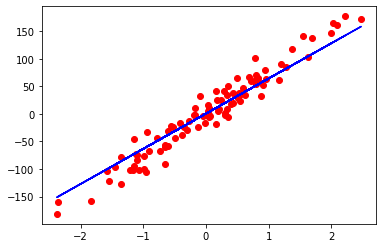

In [24]:
# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()